In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
data.shape

(8784, 8)

In [ ]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
data.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [ ]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [ ]:
data.Weather.nunique()

50

In [ ]:
x='Thunderstroms,Moderate Rain showers,Fog '

In [ ]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstroms'], ['Moderate', 'Rain', 'showers'], ['Fog']]

In [ ]:
from itertools import chain
flat_list =list(chain(*list_of_lists))
flat_list

['Thunderstroms', 'Moderate', 'Rain', 'showers', 'Fog']

In [ ]:
def create_list(x):
  list_of_lists = [w.split() for w in x.split(',')]
  flat_list =list(chain(*list_of_lists))
  return flat_list

def get_weather(list1):
  if 'Fog' in list1 and 'Rain' in list1:
    return 'RAIN+FOG'
  elif 'Snow' in list1 and 'Rain' in list1:
    return 'SNOW+RAIN'
  elif 'Snow' in list1:
    return 'SNOW'
  elif 'Rain' in list1:
    return 'RAIN'
  elif 'Fog' in list1:
    return 'FOG'
  elif 'Clear' in list1:
    return 'Clear'
  elif 'Cloudy' in list1:
    return 'Cloudy'
  else:
    return 'RAIN'


In [ ]:
create_list(x)

['Thunderstroms', 'Moderate', 'Rain', 'showers', 'Fog']

In [ ]:
get_weather(create_list(x))

'RAIN+FOG'

In [ ]:
data['std_Weather'] = data['Weather'].apply(lambda x : get_weather(create_list(x)))

In [ ]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [ ]:
data.std_Weather.value_counts()

Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: std_Weather, dtype: int64

In [ ]:
Cloudy_df =data[data['std_Weather'] == 'Cloudy'].sample(600)
Cloudy_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
8242,12/9/2012 10:00,-1.5,-4.5,80,20,24.1,102.35,Cloudy,Cloudy
8195,12/7/2012 11:00,2.6,-5.0,57,4,48.3,101.24,Mostly Cloudy,Cloudy
619,1/26/2012 19:00,-4.5,-13.5,49,17,25.0,101.25,Cloudy,Cloudy
1155,2/18/2012 3:00,0.3,-4.7,69,26,25.0,100.72,Mostly Cloudy,Cloudy
6089,9/10/2012 17:00,16.1,4.9,47,20,48.3,101.39,Mostly Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...
5614,8/21/2012 22:00,18.5,13.3,72,6,25.0,101.33,Mostly Cloudy,Cloudy
2291,4/5/2012 11:00,4.8,-7.1,42,26,24.1,100.77,Mostly Cloudy,Cloudy
1371,2/27/2012 3:00,-8.3,-13.7,65,9,25.0,102.59,Cloudy,Cloudy
5458,8/15/2012 10:00,21.5,18.3,82,13,24.1,100.75,Cloudy,Cloudy


In [ ]:
Cloudy_df =data[data['std_Weather'] == 'Cloudy']
Cloudy_df_sample = Cloudy_df.sample(600)
Cloudy_df_sample.shape

(600, 9)

In [ ]:
clear_df =data[data['std_Weather']=='Clear'].sample(600)
clear_df.shape

(600, 9)

In [ ]:
 rain_df =data[data['std_Weather']=='RAIN']
 snow_df =data[data['std_Weather']=='SNOW']

In [ ]:
rain_df.shape

(603, 9)

In [ ]:
snow_df.shape

(556, 9)

In [ ]:
Weather_df =pd.concat([Cloudy_df_sample, clear_df, rain_df, snow_df], axis =0)
Weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
894,2/7/2012 6:00,-2.9,-8.8,64,20,25.0,101.27,Mostly Cloudy,Cloudy
661,1/28/2012 13:00,0.9,-3.5,72,4,48.3,100.58,Cloudy,Cloudy
8628,12/25/2012 12:00,-9.4,-14.4,67,9,24.1,101.92,Cloudy,Cloudy
2010,3/24/2012 18:00,6.1,-9.9,31,13,48.3,101.46,Cloudy,Cloudy
7390,11/3/2012 22:00,4.7,0.5,74,17,25.0,100.79,Cloudy,Cloudy


In [ ]:
Weather_df.shape

(2359, 9)

In [ ]:
Weather_df.std_Weather.value_counts()

RAIN      603
Cloudy    600
Clear     600
SNOW      556
Name: std_Weather, dtype: int64

In [ ]:
Weather_df.drop(columns = ['Date/Time', 'Weather'],axis =1, inplace = True)

In [ ]:
Weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
894,-2.9,-8.8,64,20,25.0,101.27,Cloudy
661,0.9,-3.5,72,4,48.3,100.58,Cloudy
8628,-9.4,-14.4,67,9,24.1,101.92,Cloudy
2010,6.1,-9.9,31,13,48.3,101.46,Cloudy
7390,4.7,0.5,74,17,25.0,100.79,Cloudy


In [ ]:
Weather_df[Weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather


In [ ]:
Weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
std_Weather         0
dtype: int64

In [ ]:
Weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
std_Weather          object
dtype: object

In [ ]:
Weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.00000,2359.000000,2359.00000,2359.000000,2359.000000
mean,6.268504,1.31170,72.749470,16.61933,22.994955,100.792959
std,11.155758,10.39588,15.710039,9.35911,12.568950,0.911678
min,-22.800000,-28.00000,19.000000,0.00000,0.600000,97.520000
25%,-3.050000,-6.80000,63.000000,9.00000,16.100000,100.290000
50%,5.000000,0.20000,76.000000,15.00000,24.100000,100.820000
75%,15.900000,10.10000,85.000000,22.00000,25.000000,101.380000
max,32.700000,23.10000,99.000000,57.00000,48.300000,103.590000


In [ ]:
cols = ['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']


In [ ]:
cor_matrix =Weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.941994,-0.228675,-0.135169,0.388520,-0.092587
Dew Point Temp_C,0.941994,1.000000,0.104751,-0.132093,0.180465,-0.197350
Rel Hum_%,-0.228675,0.104751,1.000000,0.020617,-0.652906,-0.320353
Wind Speed_km/h,-0.135169,-0.132093,0.020617,1.000000,-0.142089,-0.401580
Visibility_km,0.388520,0.180465,-0.652906,-0.142089,1.000000,0.328447
Press_kPa,-0.092587,-0.197350,-0.320353,-0.401580,0.328447,1.000000


<Axes: >

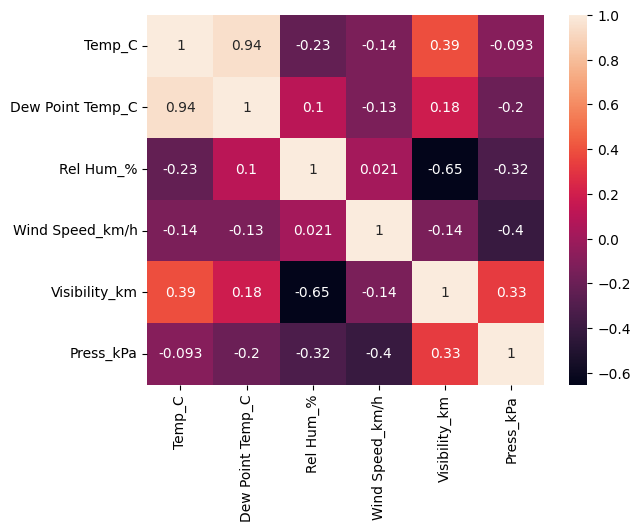

In [ ]:
sns.heatmap(cor_matrix, annot =True)

In [ ]:
Weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

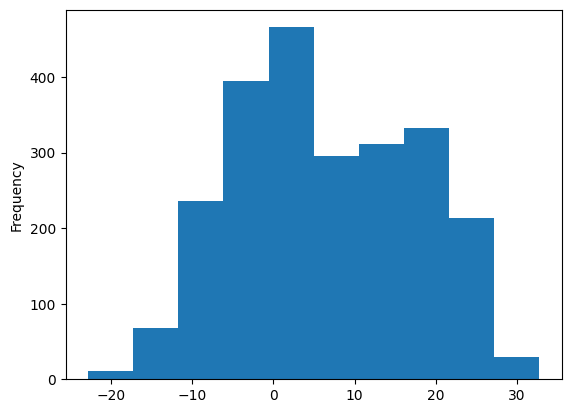

In [ ]:
Weather_df['Temp_C'].plot(kind ='hist')

<Axes: ylabel='Frequency'>

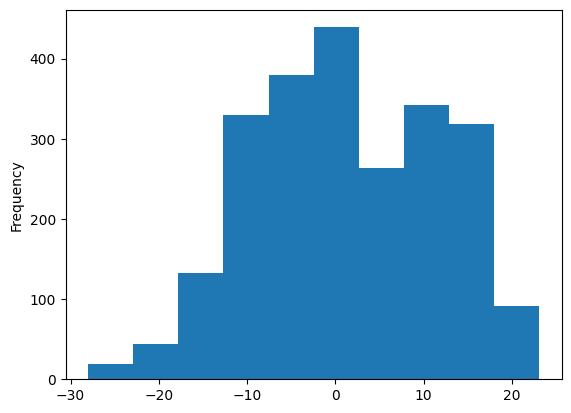

In [ ]:
Weather_df['Dew Point Temp_C'].plot(kind ='hist')

<Axes: ylabel='Frequency'>

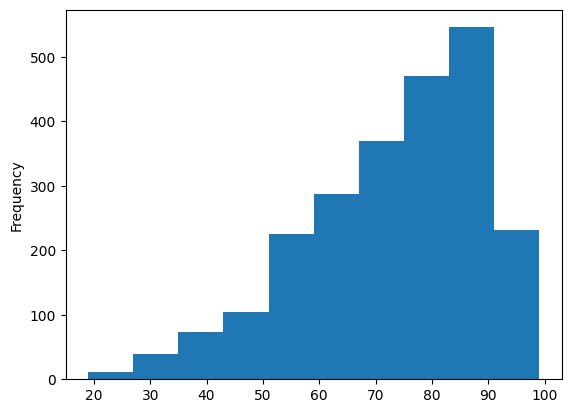

In [ ]:
Weather_df['Rel Hum_%'].plot(kind ='hist')

<Axes: ylabel='Frequency'>

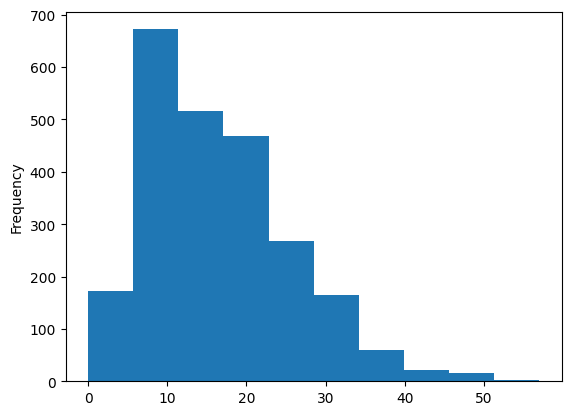

In [ ]:
Weather_df['Wind Speed_km/h'].plot(kind ='hist')

<Axes: >

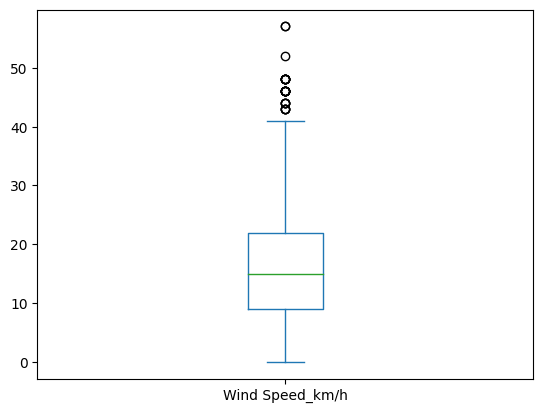

In [ ]:
Weather_df['Wind Speed_km/h'].plot(kind ='box')

<Axes: ylabel='Frequency'>

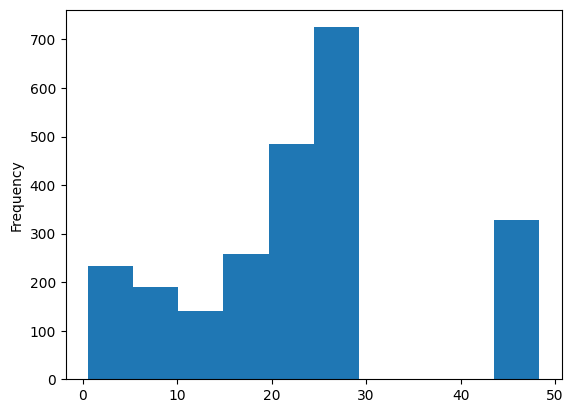

In [ ]:
Weather_df['Visibility_km'].plot(kind ='hist')

<Axes: >

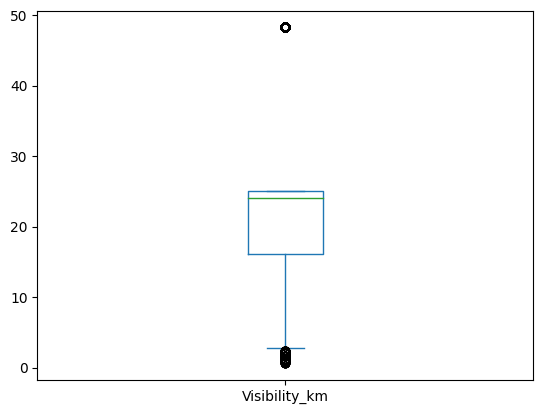

In [ ]:
Weather_df['Visibility_km'].plot(kind ='box')

In [ ]:
Weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
894,-2.9,-8.8,64,20,25.0,101.27,Cloudy
661,0.9,-3.5,72,4,48.3,100.58,Cloudy
8628,-9.4,-14.4,67,9,24.1,101.92,Cloudy
2010,6.1,-9.9,31,13,48.3,101.46,Cloudy
7390,4.7,0.5,74,17,25.0,100.79,Cloudy


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_Encoder =LabelEncoder()

In [ ]:
Weather_df['std_Weather'] = label_Encoder.fit_transform(Weather_df['std_Weather'])

In [ ]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [ ]:
Weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
894,-2.9,-8.8,64,20,25.0,101.27,1
661,0.9,-3.5,72,4,48.3,100.58,1
8628,-9.4,-14.4,67,9,24.1,101.92,1
2010,6.1,-9.9,31,13,48.3,101.46,1
7390,4.7,0.5,74,17,25.0,100.79,1


In [ ]:
Weather_df.std_Weather.value_counts()

2    603
1    600
0    600
3    556
Name: std_Weather, dtype: int64

In [ ]:
X = Weather_df.drop(['std_Weather'],axis = 1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
894,-2.9,-8.8,64,20,25.0,101.27
661,0.9,-3.5,72,4,48.3,100.58
8628,-9.4,-14.4,67,9,24.1,101.92
2010,6.1,-9.9,31,13,48.3,101.46
7390,4.7,0.5,74,17,25.0,100.79
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [ ]:
y = Weather_df['std_Weather']
y

894     1
661     1
8628    1
2010    1
7390    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: std_Weather, Length: 2359, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()

In [ ]:
X_std = std_scaler.fit_transform(X)
X_std

array([[-0.82203718, -0.97287041, -0.55705306,  0.3612936 ,  0.15955745,
         0.52336711],
       [-0.48133368, -0.46294495, -0.04771656, -1.34863311,  2.01372508,
        -0.23363955],
       [-1.40481948, -1.51165957, -0.36605187, -0.81428101,  0.08793724,
         1.23648932],
       ...,
       [-0.60685602, -0.27052025,  1.28929176,  1.21625695, -1.44791834,
        -0.92481955],
       [-0.57995837, -0.29938396,  1.03462351,  1.21625695, -1.0579861 ,
        -0.96870399],
       [-0.56202661, -0.32824766,  0.84362232,  1.42999779, -0.93066128,
        -0.99064621]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_std,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape,x_test.shape

((1887, 6), (472, 6))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

In [ ]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt =decision_tree_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score( y_test, y_pred_dt)

0.6186440677966102

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       118
           1       0.49      0.40      0.44       128
           2       0.69      0.72      0.71       126
           3       0.76      0.74      0.75       100

    accuracy                           0.62       472
   macro avg       0.62      0.63      0.62       472
weighted avg       0.62      0.62      0.61       472



<Axes: >

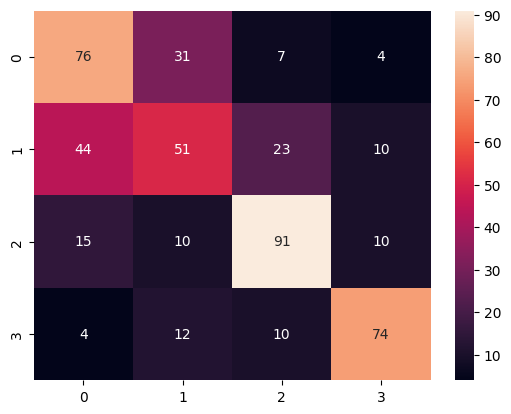

In [ ]:
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot = True, fmt ='d')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [ ]:
model_list = [dt_model,rf_model ,svc_model,knn_model,lr_model,nb_model]

In [ ]:
acc_list =[]
for model in model_list:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  acc_list.append(acc)

In [ ]:
acc_list

[0.6271186440677966,
 0.6440677966101694,
 0.6038135593220338,
 0.6038135593220338,
 0.5847457627118644,
 0.559322033898305]

In [ ]:
model_df =pd.DataFrame({'model': model_list,"Accuracy" : acc_list})
model_df

,model,Accuracy
0,DecisionTreeClassifier(),0.627119
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.644068
2,SVC(),0.603814
3,KNeighborsClassifier(),0.603814
4,LogisticRegression(),0.584746
5,GaussianNB(),0.559322


In [ ]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(rf_model,X_std,y, cv =5, scoring='accuracy')
print('Cross-validation scores =', scores)

Cross-validation scores = [0.61228814 0.65889831 0.61864407 0.56779661 0.64543524]


In [ ]:
scores.mean()

0.6206124725610854

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
parameters ={
    'n_estimators' : [50,100],
    'max_feature' : ['sqrt','log2' , None]
}

In [ ]:
grid_search = GridSearchCV(estimator= rf_model,
                          param_grid = parameters )

In [ ]:
Random_forest_model_new = RandomForestClassifier(max_features= 'log2', n_estimators=50)

In [ ]:
Random_forest_model_new.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [ ]:
y_pred_rf =Random_forest_model_new.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.6292372881355932

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new,X_std,y,cv=5,scoring='accuracy')
print('Cross-validation scores =',scores)

Cross-validation scores = [0.59110169 0.63135593 0.61652542 0.59533898 0.64543524]


In [ ]:
scores.mean()

0.6159514556119328